# ML Model Blueprint

## Data cleaning:
Handle missing data: Impute missing values or remove rows/columns with missing values.
Handle duplicates: Remove duplicate rows if necessary.
Handle outliers: Optionally, handle outliers if they are deemed problematic for the analysis.

In [41]:
# import necessary libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# load the dataset 

b_cancer = pd.read_csv('Dataset _01.csv')

# data cleaning 

# inspect data

b_cancer.shape

# Inspect: number of samples and number of samples
print(str("dataset has ") + str(b_cancer.shape[0])+str(' samples / instances & ')+str(b_cancer.shape[1])+ str(' features'))
b_cancer.head(10)
b_cancer.columns

# count number of missing values for each feature

b_cancer.isna().sum()

# no missing values 

# check for uplicate rows 

duplicate_rows = b_cancer[b_cancer.duplicated()]
print(duplicate_rows) # empty 

#check data types 

print(b_cancer.dtypes) #int64 is sufficient for binary classification

dataset has 94 samples / instances & 50 features
Empty DataFrame
Columns: [Subjects, Grade, original_firstorder_Skewness_t1c, original_glrlm_HighGrayLevelRunEmphasis_t1c, wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c, wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c, wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c, wavelet-HLH_firstorder_Mean_t1c, wavelet-HLH_glszm_ZoneEntropy_t1c, wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c, wavelet-HHH_firstorder_Skewness_t1c, wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c, original_glszm_HighGrayLevelZoneEmphasis_t2f, wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f, wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f, wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f, wavelet-HLL_glrlm_RunVariance_t2f, wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f, wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f, wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f, wavelet-LLL_firstorder_Skewness_t1c, origi

## Preliminary data analysis:
Data visualization: Explore the cleaned data using visualizations. Correlation analysis: Investigate correlations between features and the target variable.

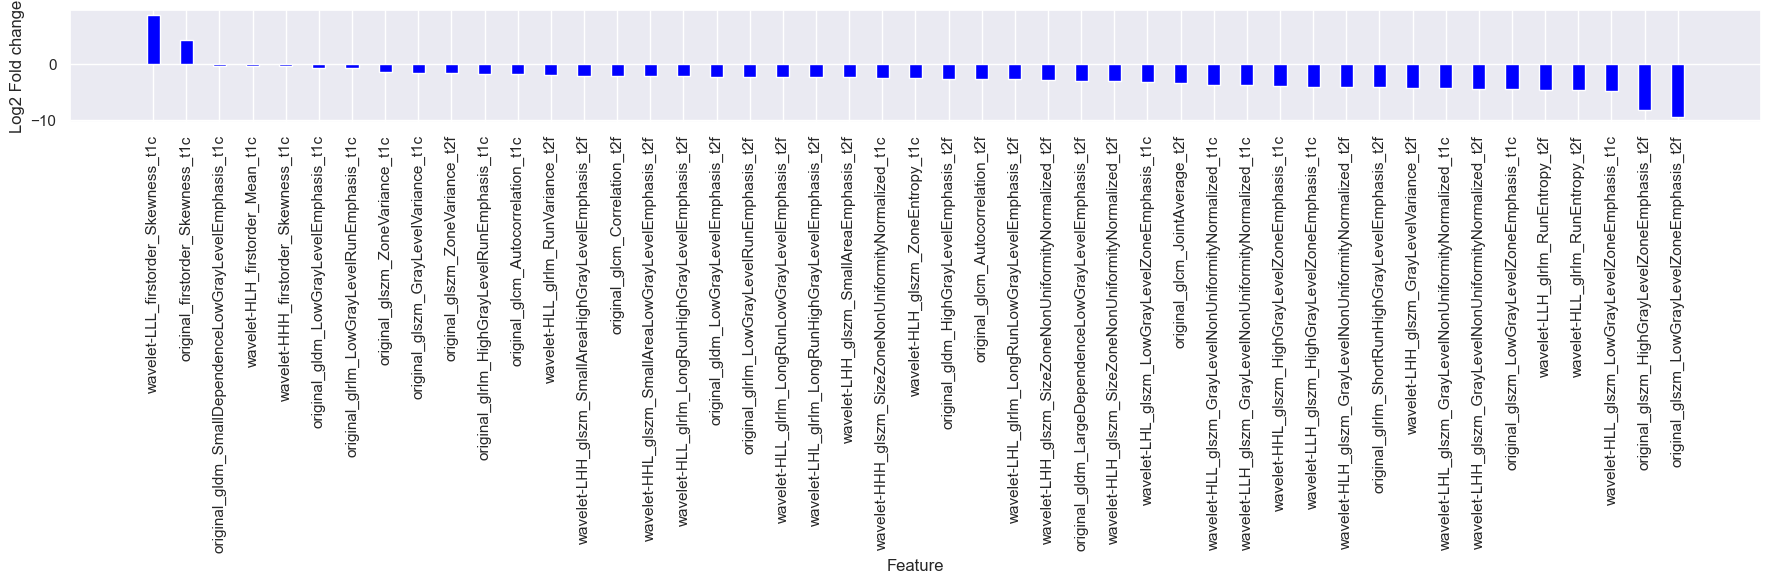

In [42]:
# exploratory data analysis 

b_cancer.describe()

# refine to present 

stats_canc = b_cancer.describe().T
stats_canc.head(10)

# stats for grade 1

grade_one = b_cancer[b_cancer['Grade']==0].describe().T
grade_one.head(10)

# stats for grade 2 

grade_two = b_cancer[b_cancer['Grade']==1].describe().T
grade_two.head(10)

#compare fold change 
# create dataframe
f_means = pd.DataFrame({'Grade 1':grade_one[:-1]['mean'], 'Grade 2':grade_two[:-1]['mean']})

# calculate fold changes and add to dataframe
fc = (f_means['Grade 1'] - f_means['Grade 2']) / f_means['Grade 2']
f_means['fc'] = fc

# calculate Log2 of fold change and add to data frame
log2_fc = np.log2(np.abs(fc))
f_means['log2_fc'] = log2_fc
f_means = f_means.reset_index().rename(columns = {'index':'feature'})

# Drop the 'Grade' row before sorting
f_means = f_means[f_means['feature'] != 'Grade']

# sort dataframe according to fold change
f_means['abs'] = abs(f_means['fc'])

# Sort by fold absolute change
f_means = f_means.sort_values(by = ['abs'],ascending = False).drop(columns = ['abs'])
f_means.head(10)

# plot fold changes 

plt.figure(figsize=(18, 6))
plt.bar(f_means['feature'], f_means['log2_fc'], color='blue', width=0.4)
plt.xticks(f_means['feature'], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Log2 Fold change')  # Updated y-axis label
plt.tight_layout()

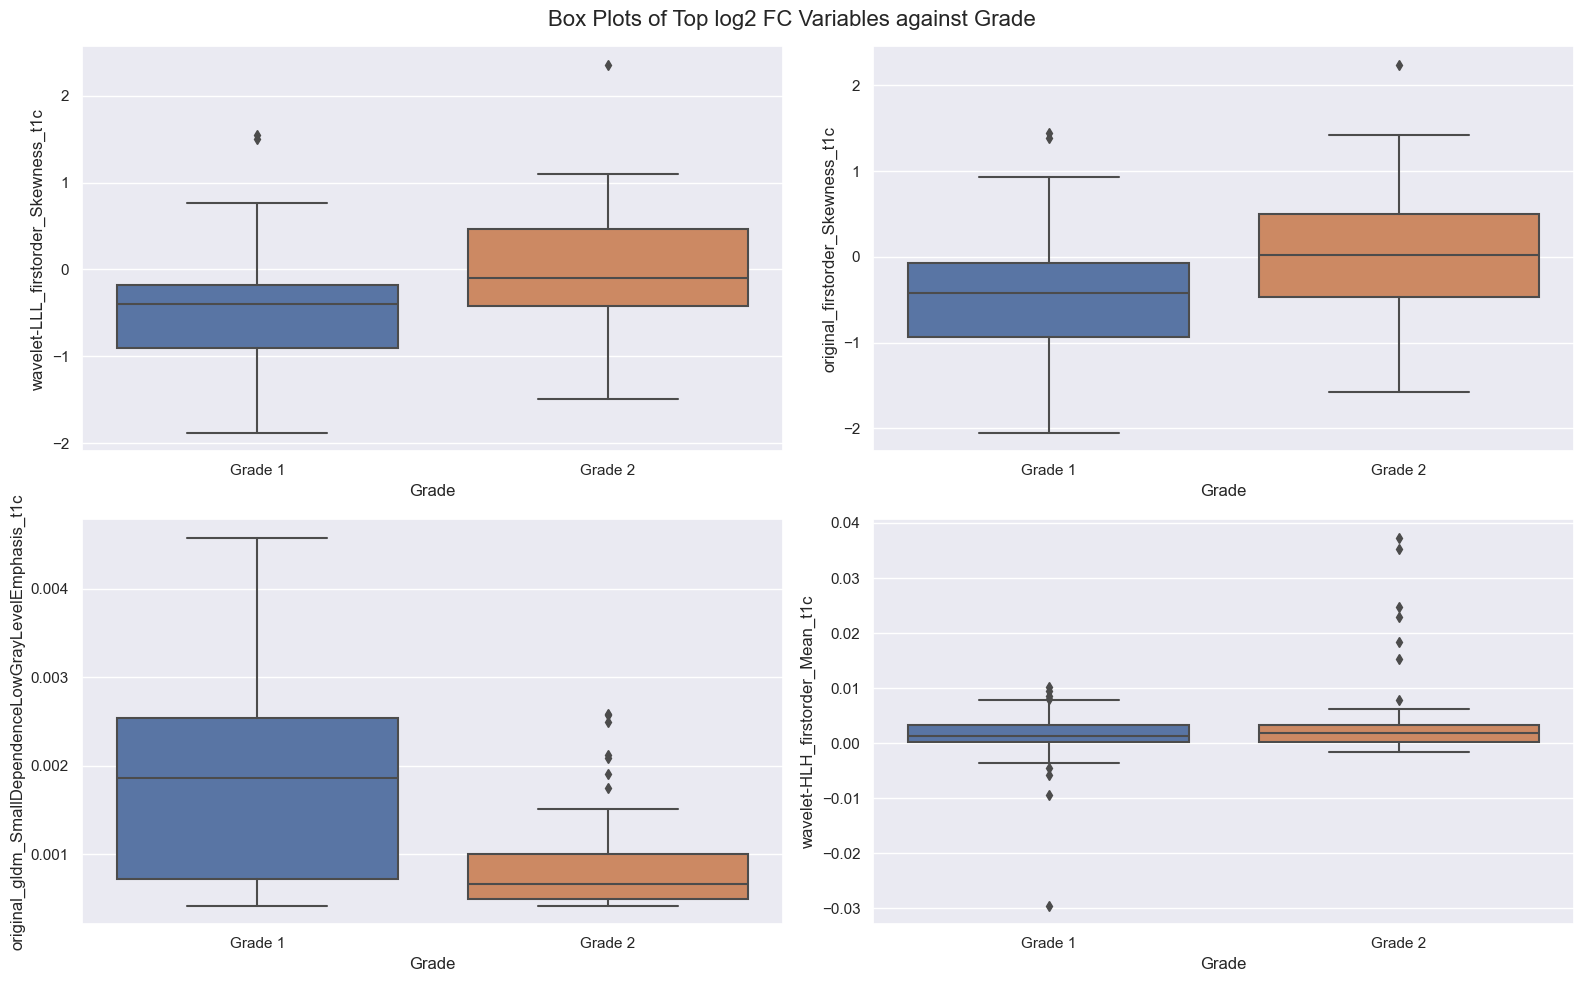

In [43]:
# Extract top ten variables from f_means
top_variables = f_means.head(10)['feature']

# Select columns corresponding to top variables from b_cancer
top_variables_data = b_cancer[['Grade'] + top_variables.tolist()]

# Set seaborn plotting aesthetics as default
sns.set()

# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Create box plot in each subplot
sns.boxplot(x='Grade', y=top_variables_data[top_variables.tolist()[0]], data=top_variables_data, ax=axes[0, 0])
sns.boxplot(x='Grade', y=top_variables_data[top_variables.tolist()[1]], data=top_variables_data, ax=axes[0, 1])
sns.boxplot(x='Grade', y=top_variables_data[top_variables.tolist()[2]], data=top_variables_data, ax=axes[1, 0])
sns.boxplot(x='Grade', y=top_variables_data[top_variables.tolist()[3]], data=top_variables_data, ax=axes[1, 1])

# Amend x-axis tick labels
for ax in axes.flatten():
    ax.set_xticklabels(['Grade 1', 'Grade 2'])

# Set labels and title
for ax, feature in zip(axes.flatten(), top_variables):
    ax.set_xlabel('Grade')
    ax.set_ylabel(feature)

# Add a single title above all subplots
fig.suptitle('Box Plots of Top log2 FC Variables against Grade', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

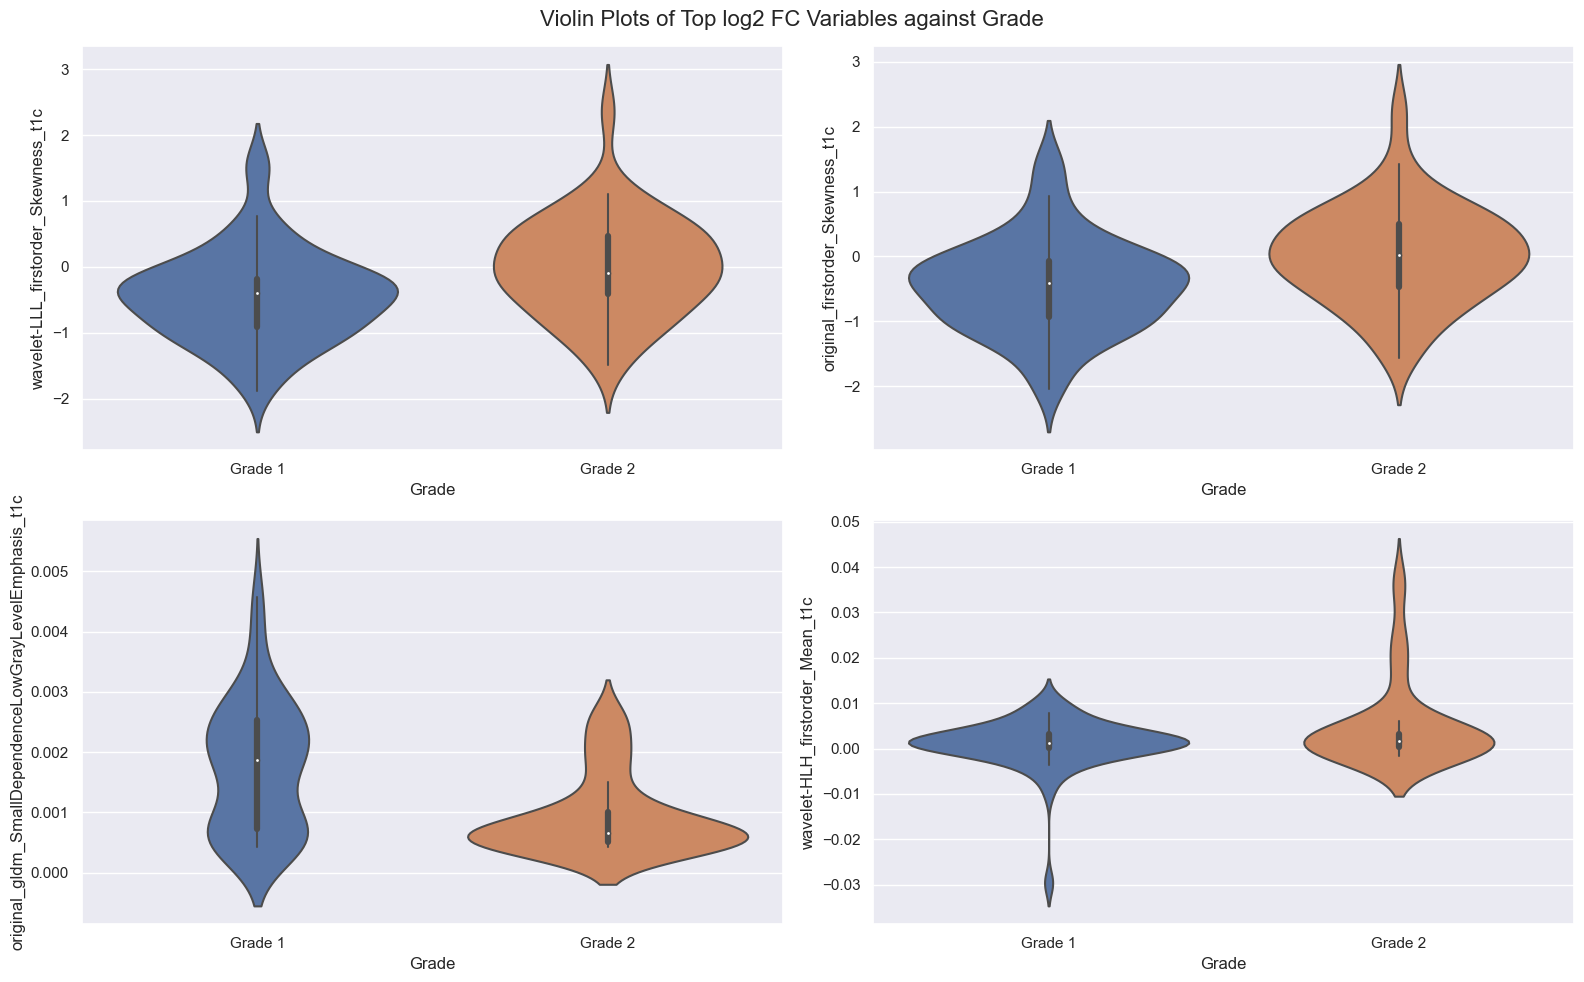

In [44]:
# Extract top ten variables from f_means
top_variables = f_means.head(10)['feature']

# Select columns corresponding to top variables from b_cancer
top_variables_data = b_cancer[['Grade'] + top_variables.tolist()]

# Set seaborn plotting aesthetics as default
sns.set()

# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Create violin plot in each subplot
sns.violinplot(x='Grade', y=top_variables_data[top_variables.tolist()[0]], data=top_variables_data, ax=axes[0, 0])
sns.violinplot(x='Grade', y=top_variables_data[top_variables.tolist()[1]], data=top_variables_data, ax=axes[0, 1])
sns.violinplot(x='Grade', y=top_variables_data[top_variables.tolist()[2]], data=top_variables_data, ax=axes[1, 0])
sns.violinplot(x='Grade', y=top_variables_data[top_variables.tolist()[3]], data=top_variables_data, ax=axes[1, 1])

# Amend x-axis tick labels
for ax in axes.flatten():
    ax.set_xticklabels(['Grade 1', 'Grade 2'])

# Set labels and title
for ax, feature in zip(axes.flatten(), top_variables):
    ax.set_xlabel('Grade')
    ax.set_ylabel(feature)

# Add a single title above all subplots
fig.suptitle('Violin Plots of Top log2 FC Variables against Grade', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\russe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\russe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\russe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\russe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

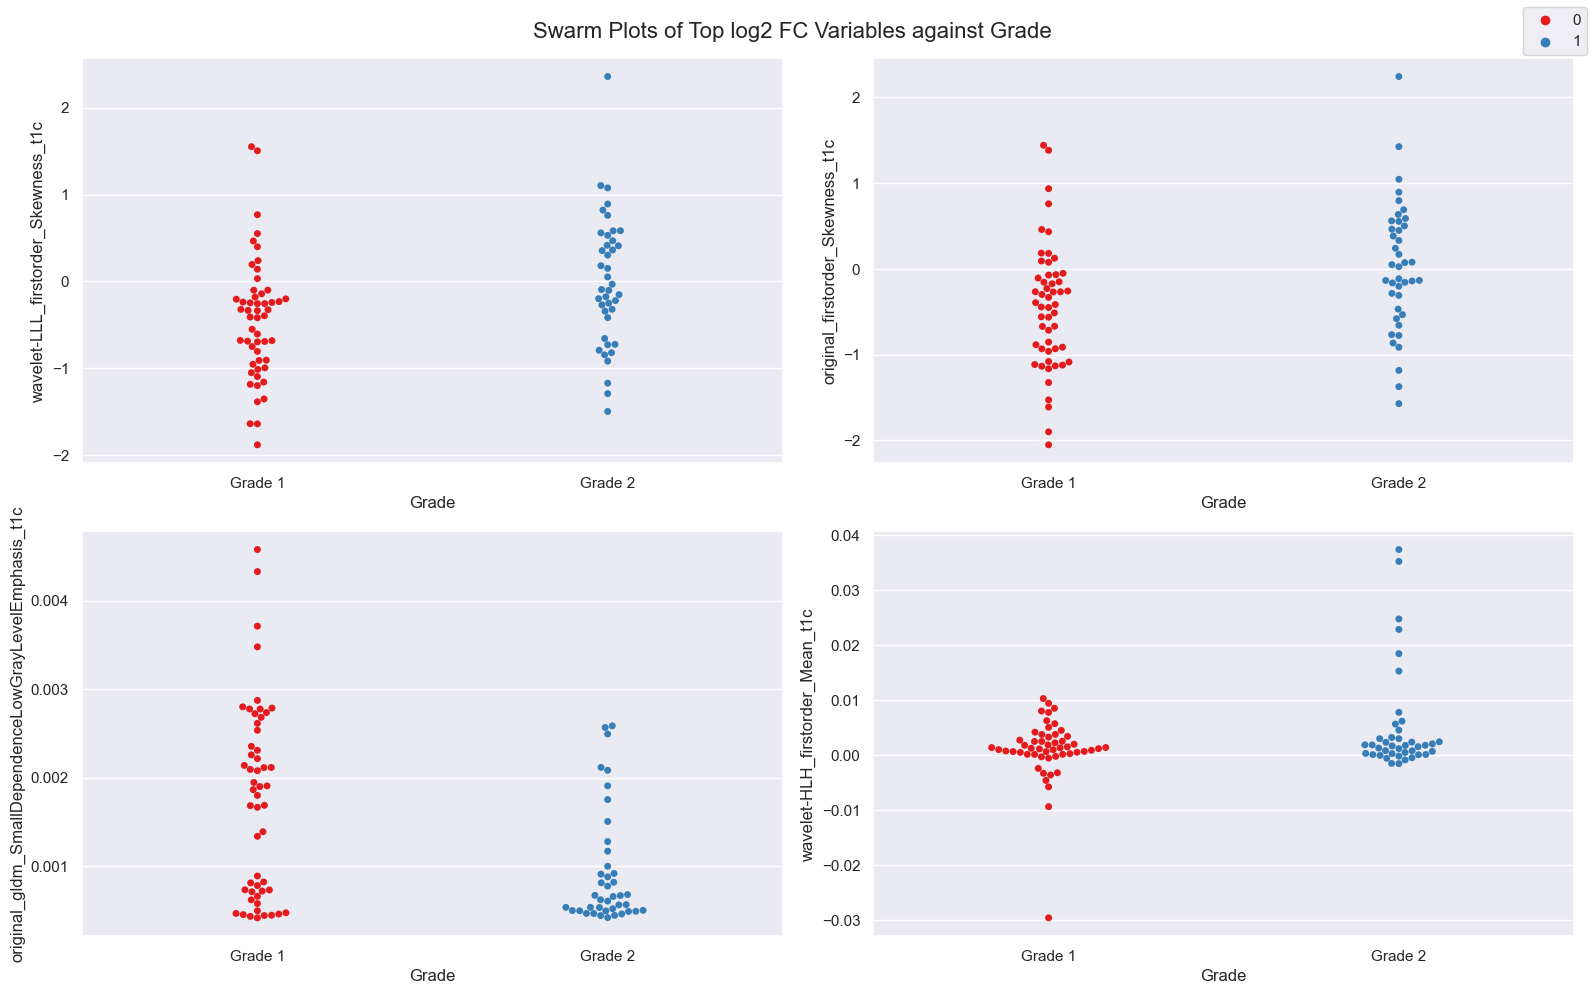

In [45]:
# Extract top ten variables from f_means
top_variables = f_means.head(10)['feature']

# Select columns corresponding to top variables from b_cancer
top_variables_data = b_cancer[['Grade'] + top_variables.tolist()]

# Set seaborn plotting aesthetics as default
sns.set()

# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Create swarm plot in each subplot
sns.swarmplot(x='Grade', y=top_variables_data[top_variables.tolist()[0]], data=top_variables_data, ax=axes[0, 0], hue='Grade', palette='Set1')
sns.swarmplot(x='Grade', y=top_variables_data[top_variables.tolist()[1]], data=top_variables_data, ax=axes[0, 1], hue='Grade', palette='Set1')
sns.swarmplot(x='Grade', y=top_variables_data[top_variables.tolist()[2]], data=top_variables_data, ax=axes[1, 0], hue='Grade', palette='Set1')
sns.swarmplot(x='Grade', y=top_variables_data[top_variables.tolist()[3]], data=top_variables_data, ax=axes[1, 1], hue='Grade', palette='Set1')

# Amend x-axis tick labels
for ax in axes.flatten():
    ax.set_xticklabels(['Grade 1', 'Grade 2'])
    # remove legend because i've updated x axis labels
    ax.get_legend().remove()

# Set labels and title
for ax, feature in zip(axes.flatten(), top_variables):
    ax.set_xlabel('Grade')
    ax.set_ylabel(feature)

# Add a single title above all subplots
fig.suptitle('Swarm Plots of Top log2 FC Variables against Grade', fontsize=16)

# Adjust legend location
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

In [46]:
# see if features are normally dist
from scipy import stats

# list features 
features = [col for col in b_cancer.columns if col not in['Grade', 'Subjects']]

# Loop through each feature
for feature in features:
    # Extract the data for the current feature
    data = b_cancer[feature]
    
    # Perform normality test
    stat, p = stats.normaltest(data)
    
    # Set significance level
    alpha = 0.05
    
    # Print the result
    print(f'Feature: {feature}')
    if p > alpha:
        print('  Data is normally distributed')
    else:
        print('  Data is not normally distributed')

Feature: original_firstorder_Skewness_t1c
  Data is normally distributed
Feature: original_glrlm_HighGrayLevelRunEmphasis_t1c
  Data is not normally distributed
Feature: wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c
  Data is not normally distributed
Feature: wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c
  Data is not normally distributed
Feature: wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c
  Data is not normally distributed
Feature: wavelet-HLH_firstorder_Mean_t1c
  Data is not normally distributed
Feature: wavelet-HLH_glszm_ZoneEntropy_t1c
  Data is normally distributed
Feature: wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c
  Data is normally distributed
Feature: wavelet-HHH_firstorder_Skewness_t1c
  Data is not normally distributed
Feature: wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c
  Data is normally distributed
Feature: original_glszm_HighGrayLevelZoneEmphasis_t2f
  Data is not normally distributed
Feature: wavelet-LHH_glszm_GrayLevelNonUn

In [47]:
import pandas as pd
from scipy import stats

# List features to perform tests on  
features = [col for col in b_cancer.columns if col not in ['Grade', 'Subjects']]

# Initialize lists to store normally and not normally distributed features
normally_distributed_features = []
not_normally_distributed_features = []
results = []

# Loop through each feature
for feature in features:
    # Extract the data for the current feature
    data = b_cancer[feature]
    
    # Perform normality test
    stat, p = stats.normaltest(data)
    
    # Set significance level
    alpha = 0.05
    
    # Determine whether the data is normally distributed and perform the corresponding test
    if p > alpha:
        normally_distributed_features.append(feature)
        grade = 1  # Choose either 0 or 1, as per your preference
        group1 = b_cancer[b_cancer['Grade'] == grade][feature]
        group2 = b_cancer[b_cancer['Grade'] != grade][feature]
        t_stat, p_value = stats.ttest_ind(group1, group2)
        results.append({'Feature': feature, 'Test': 'T-test', 'Statistic': t_stat, 'P-value': p_value})
    else:
        not_normally_distributed_features.append(feature)
        grade = 1  # Choose either 0 or 1, as per your preference
        group1 = b_cancer[b_cancer['Grade'] == grade][feature]
        group2 = b_cancer[b_cancer['Grade'] != grade][feature]
        u_stat, p_value = stats.mannwhitneyu(group1, group2)
        results.append({'Feature': feature, 'Test': 'Mann-Whitney U test', 'Statistic': u_stat, 'P-value': p_value})

# Convert results list into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


                                              Feature                 Test  \
0                    original_firstorder_Skewness_t1c               T-test   
1         original_glrlm_HighGrayLevelRunEmphasis_t1c  Mann-Whitney U test   
2   wavelet-LLH_glszm_GrayLevelNonUniformityNormal...  Mann-Whitney U test   
3   wavelet-LHL_glszm_GrayLevelNonUniformityNormal...  Mann-Whitney U test   
4   wavelet-HLL_glszm_GrayLevelNonUniformityNormal...  Mann-Whitney U test   
5                     wavelet-HLH_firstorder_Mean_t1c  Mann-Whitney U test   
6                   wavelet-HLH_glszm_ZoneEntropy_t1c               T-test   
7     wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c               T-test   
8                 wavelet-HHH_firstorder_Skewness_t1c  Mann-Whitney U test   
9   wavelet-HHH_glszm_SizeZoneNonUniformityNormali...               T-test   
10       original_glszm_HighGrayLevelZoneEmphasis_t2f  Mann-Whitney U test   
11  wavelet-LHH_glszm_GrayLevelNonUniformityNormal...  Mann-Whit

In [48]:
# calculate ROC with AUC and append it to results_df
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Iterate over each continuous predictor variable
for feature in features:
    # Perform logistic regression with the predictor variable
    X = b_cancer[[feature]]
    y = b_cancer['Grade']
    model = LogisticRegression()
    model.fit(X, y)
    
    # Calculate predicted probabilities
    predicted_probabilities = model.predict_proba(X)[:, 1]
    
    # Calculate the AUC
    auc = roc_auc_score(y, predicted_probabilities)
    
    # Find the corresponding row and append the AUC value
    index = results_df[results_df['Feature'] == feature].index
    if not index.empty:
        results_df.loc[index, 'AUC'] = auc

print(results_df)

                                              Feature                 Test  \
0                    original_firstorder_Skewness_t1c               T-test   
1         original_glrlm_HighGrayLevelRunEmphasis_t1c  Mann-Whitney U test   
2   wavelet-LLH_glszm_GrayLevelNonUniformityNormal...  Mann-Whitney U test   
3   wavelet-LHL_glszm_GrayLevelNonUniformityNormal...  Mann-Whitney U test   
4   wavelet-HLL_glszm_GrayLevelNonUniformityNormal...  Mann-Whitney U test   
5                     wavelet-HLH_firstorder_Mean_t1c  Mann-Whitney U test   
6                   wavelet-HLH_glszm_ZoneEntropy_t1c               T-test   
7     wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c               T-test   
8                 wavelet-HHH_firstorder_Skewness_t1c  Mann-Whitney U test   
9   wavelet-HHH_glszm_SizeZoneNonUniformityNormali...               T-test   
10       original_glszm_HighGrayLevelZoneEmphasis_t2f  Mann-Whitney U test   
11  wavelet-LHH_glszm_GrayLevelNonUniformityNormal...  Mann-Whit

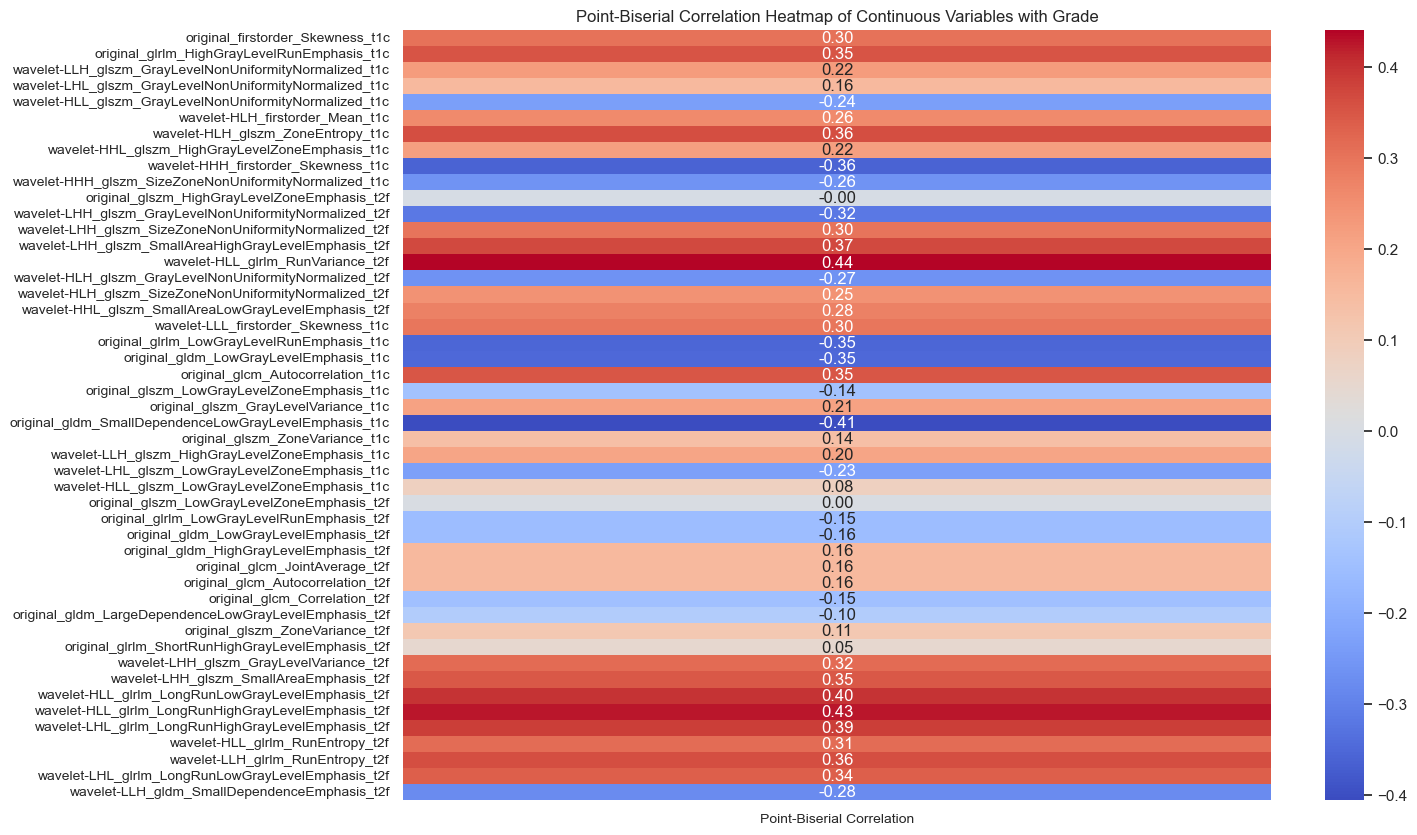

In [49]:
# all of these correlation graphs need to have their axis/ keys corrected to be viable for inclusion in report
# create correlation heat map on unscaled data of continuous variables with grade using point-biserial correlation
from scipy.stats import pointbiserialr

# Extract continuous variables excluding 'Grade' and 'Subjects'
continuous_vars = b_cancer.drop(columns=['Grade', 'Subjects'])

# Calculate point-biserial correlation between binary 'Grade' and continuous variables
point_biserial_correlation = {}
for col in continuous_vars.columns:
    corr_coef, p_value = pointbiserialr(b_cancer[col], b_cancer['Grade'])
    point_biserial_correlation[col] = corr_coef

# Convert the dictionary to a DataFrame for visualization
point_biserial_df = pd.DataFrame.from_dict(point_biserial_correlation, orient='index', columns=['Point-Biserial Correlation'])

# transpose df to make horizontal graph
point_biserial_df = point_biserial_df.transpose()

# plot heatmap
plt.figure(figsize=(14, 10))  # Increase the figure size
heatmap = sns.heatmap(point_biserial_df.transpose(), cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(fontsize=10)  # Rotate x-axis labels, adjust alignment, and font size
plt.yticks(rotation=0, ha='right', fontsize=10)  # Adjust y-axis font size
plt.title('Point-Biserial Correlation Heatmap of Continuous Variables with Grade')
plt.show()

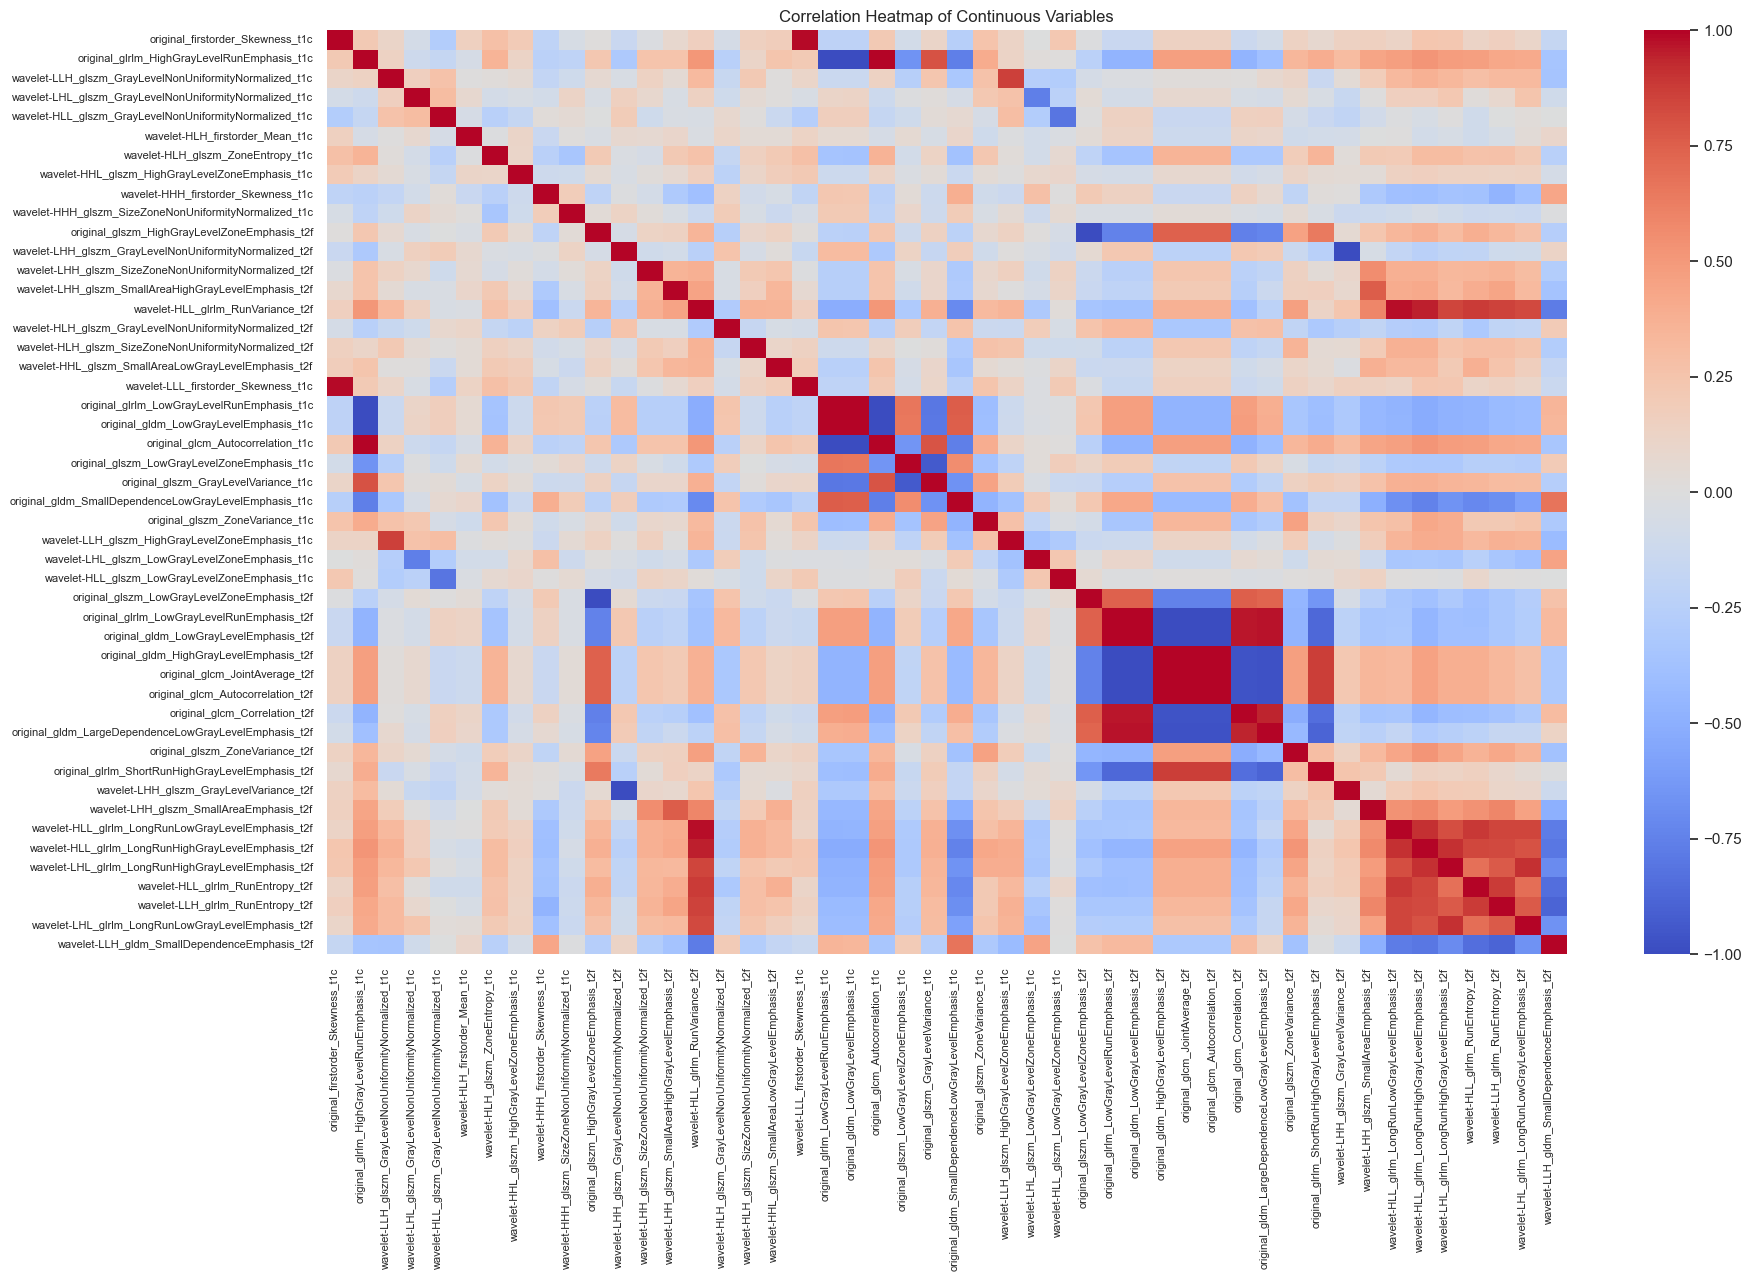

In [50]:
# make x axis more clear
# Correlation matrix of just the predictor variables to look for confounding variables 
unscaled_correlation_matrix = continuous_vars.corr()

# Create a heatmap with adjusted x-axis and y-axis tick labels
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(unscaled_correlation_matrix, annot=False, cmap='coolwarm')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate x-axis labels by 90 degrees, adjust alignment, and font size
plt.yticks(rotation=0, ha='right', fontsize=8)   # Adjust y-axis font size and alignment
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [ ]:
 # dimensionality reduction based on colinearity 

# Set colinearity threshold    
correlation_threshold = 0.80        

# Extract just the data without 'Subjects' and 'Grade'
data = b_cancer.drop(columns=['Subjects', 'Grade'])

# Calculate correlation matrix
corr_matrix = data.corr()

# Extract the upper triangle of the correlation matrix -- inter-correlations or colinearity
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Determine features that have a colinearity above threshold
# Need to use the absolute value -- to determine colinearity
to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

# Drop the identified columns from b_cancer
b_cancer_treated = b_cancer.drop(columns=to_drop)  

## Scaling 

In [51]:
# scale data    #don't run this cell to run wihout scaling 
# Import preprocessing library
from sklearn.preprocessing import StandardScaler

# Select numeric features excluding 'Subjects' and 'Grade'
numeric_features = b_cancer.drop(columns=['Subjects', 'Grade']).select_dtypes(include=['float64', 'int64'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only the numeric features
scaled_features = scaler.fit_transform(numeric_features)

# Create a DataFrame with scaled numeric features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Concatenate scaled numeric features with 'Grade' column
b_cancer = pd.concat([scaled_df, b_cancer['Grade']], axis=1)

In [ ]:
# Select numeric features excluding 'Subjects' and 'Grade'
numeric_features = b_cancer_treated.drop(columns=['Subjects', 'Grade']).select_dtypes(include=['float64', 'int64'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only the numeric features
scaled_features = scaler.fit_transform(numeric_features)

# Create a DataFrame with scaled numeric features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Concatenate scaled numeric features with 'Grade' column
b_cancer_treated = pd.concat([scaled_df, b_cancer_treated['Grade']], axis=1)


## Outlier Detection

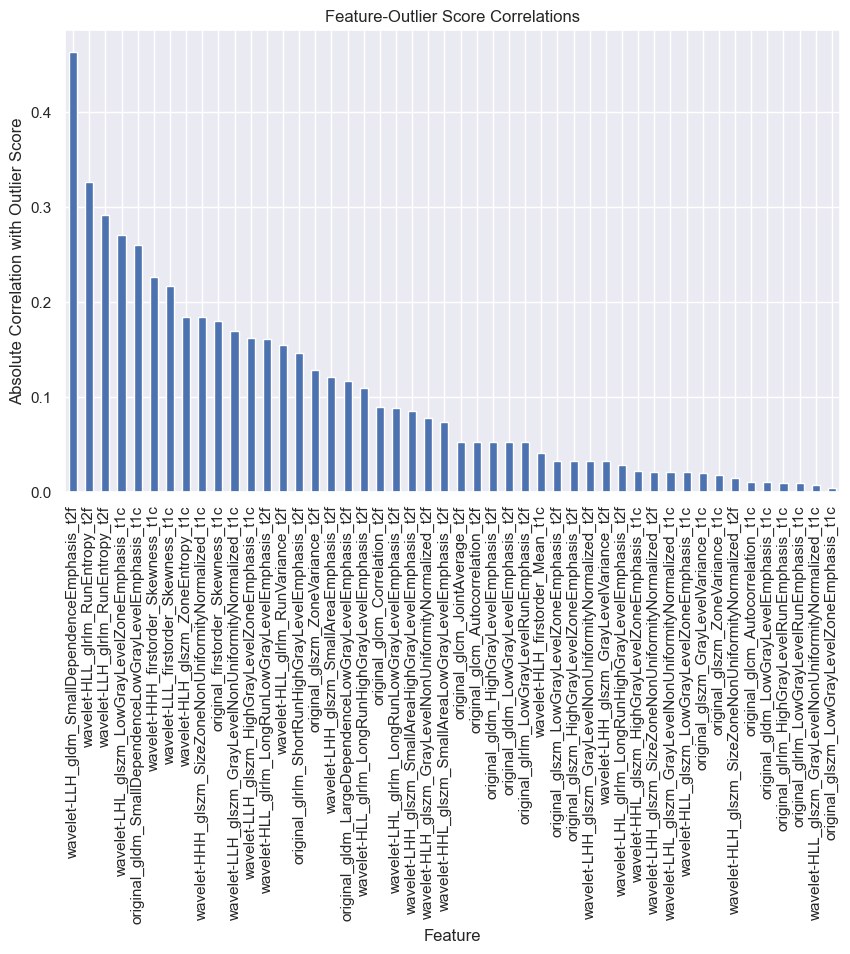

In [52]:
# outlier detection 
from sklearn.neighbors import LocalOutlierFactor

# List of features to exclude from outlier detection
exclude_features = ['Subjects', 'Grade']  # Specify the features to exclude

# Identify float columns and exclude specific features
float_columns = b_cancer.select_dtypes(include=['float']).columns
float_columns = [col for col in float_columns if col not in exclude_features]

# Subset the DataFrame to include only the selected float columns
float_data = b_cancer[float_columns]

# Instantiate and fit LOF model
lof_model = LocalOutlierFactor(contamination=0.025)  # toggle contam
outlier_scores = lof_model.fit_predict(float_data)

# Identify outliers
outliers = b_cancer.iloc[outlier_scores == -1]

# Compute correlations between each feature and their outlier scores
correlations = float_data.corrwith(pd.Series(outlier_scores))

# Sort correlations by absolute values
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Visualize feature-outlier score correlations
plt.figure(figsize=(10, 6))
sorted_correlations.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Absolute Correlation with Outlier Score')
plt.title('Feature-Outlier Score Correlations')
plt.show()

# here's how I found rows that were in the 2.5% of outliers
# but, I computed correlation scores of each feature against their outlier score
# and some features to consider/ reaffrim choices about feature selection as they are correlated highly with outlier scores
# however this could be just guiding as outliers may still be truly representative of data 


In [53]:
index_of_outliers = [36,62,77]

b_cancer_treated = b_cancer_treated.drop(index=index_of_outliers)

print(b_cancer_treated.shape)

(91, 49)


## Data splitting: 
Split the data into training and test sets.

In [56]:
from sklearn.model_selection import train_test_split

seed = 5
np.random.seed(seed)

X, y = b_cancer.drop(columns=['Grade']), b_cancer['Grade'] 

# split data into train & test sets: 70% training & 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# confirm splitting
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(65, 48) (29, 48) (65,) (29,)


In [58]:
# split treated data under same parameters
# ensure no names conflict 
seed = 5 
np.random.seed(seed)
X_treated, y_treated = b_cancer_treated.drop(columns=['Grade']), b_cancer_treated['Grade']

# Split data into train and test set (70% training, 30% testing)
X_train_treated, X_test_treated, y_train_treated, y_test_treated = train_test_split(X_treated, y_treated, test_size=0.3, random_state=1)

# Confirm splitting
print(X_train_treated.shape, X_test_treated.shape, y_train_treated.shape, y_test_treated.shape)

(63, 48) (28, 48) (63,) (28,)


## Feature selection - explore:

Filter-based method: Select features based on statistical tests or other criteria.
Wrapper method or embedded method: Use techniques like recursive feature elimination, genetic algorithms, Ridge Regression, LASSO, or Elastic Net to select features.

In [59]:
# Elastic net method for normal data

from sklearn.linear_model import ElasticNetCV

# Create an instance of ElasticNetCV
elastic_net = ElasticNetCV(cv=10, random_state=42)

# Fit the model on the training data
elastic_net.fit(X_train, y_train)

# Get the indices of selected features
selected_feature_indices = [i for i, coef in enumerate(elastic_net.coef_) if coef != 0]

# Get the names of selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001505916272957819, tolerance: 0.001298076923076923
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016306737818041483, tolerance: 0.001298076923076923
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017497770104313304, tolerance: 0.001298076923076923
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinat

Selected Features:
Index(['original_firstorder_Skewness_t1c',
       'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLH_firstorder_Mean_t1c', 'wavelet-HLH_glszm_ZoneEntropy_t1c',
       'wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c',
       'original_glszm_HighGrayLevelZoneEmphasis_t2f',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunVariance_t2f',
       'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'original_glszm_GrayLevelVariance_t1c',
       'original_glszm_LowGrayLevelZoneEmphasis_t2f',
       'original_glszm_ZoneVariance_t2f',
       'wavelet-LHH_glszm_GrayLevelVariance_t2f',
     

C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010582204913115678, tolerance: 0.0012519230769230771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01185251254063524, tolerance: 0.0012519230769230771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010876101360981938, tolerance: 0.0012519230769230771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinat

In [60]:
# Filter X_train and X_test to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [61]:
# do the same for the outliers/correlation removed df

# Create an instance of ElasticNetCV
elastic_net = ElasticNetCV(cv=10, random_state=42) # set cv = 10 as this is standard practise and relatively small dataset

# Fit the model on the training data
elastic_net.fit(X_train_treated, y_train_treated)

# Get the indices of selected features
treated_selected_feature_indices = [i for i, coef in enumerate(elastic_net.coef_) if coef != 0]

# Get the names of selected features
treated_selected_features = X_train_treated.columns[treated_selected_feature_indices]

# Print the selected features
print("Treated Data - Selected Features:")
print(treated_selected_features)


C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013825395093429727, tolerance: 0.001248
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016970181547062424, tolerance: 0.001248
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002375358883002221, tolerance: 0.001248
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning

Outliers removed - Selected Features:
Index(['original_glrlm_HighGrayLevelRunEmphasis_t1c',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLH_firstorder_Mean_t1c', 'wavelet-HLH_glszm_ZoneEntropy_t1c',
       'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c',
       'wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c',
       'original_glszm_HighGrayLevelZoneEmphasis_t2f',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'original_glrlm_LowGrayLevelRunEmphasis_t1c',
       'original_glszm_GrayLevelVariance_t1c',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c',
       'original_glszm_ZoneVariance_t1c',
       'wavele

C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016113428565927013, tolerance: 0.0012627450980392159
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017520120635576841, tolerance: 0.0012627450980392159
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017885154944539128, tolerance: 0.0012627450980392159
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\russe\anaconda3\Lib\site-packages\sklearn\linear_model\_coord

In [62]:
# same for outliers removed data
# Filter X_train and X_test to include only selected features
X_train_treated_selected = X_train_treated[treated_selected_features]
X_test_treated_selected = X_test_treated[treated_selected_features]

## Model Training:

Train at least three different machine learning classifiers on the training dataset. Experiment with various algorithms such as logistic regression, random forest, support vector machine, k-Nearest Neighbours, etc. Explore techniques to enhance performance, such as feature engineering, ensemble methods, or algorithm-specific optimizations.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
# firstly for non-treated data   # this section creates a boxplot based on accuracy scores of training data
# prepare configuration for cross validation test harness  # cv to assess diff models then will train on training data


# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(kernel='poly')))
models.append(('RF', RandomForestClassifier()))
models.append(('BG', BaggingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('SGDC', SGDClassifier()))
models.append(('NN', Perceptron()))
models.append(('XGB', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('CatBoost', CatBoostClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# sort the data and labels
X = X_train_selected
y = y_train
Y = y

# Accuracy
print('Calculating accuracies')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.05)
plt.tight_layout()
plt.show()

In [ ]:
# train non-treated data on training data and make data frme of metric results
seed = 6
np.random.seed(seed)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(kernel='poly')))
models.append(('RF', RandomForestClassifier()))
models.append(('BG', BaggingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('SGDC', SGDClassifier()))
models.append(('NN', Perceptron()))
models.append(('XGB', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('CatBoost', CatBoostClassifier()))

# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
metrics = ['accuracy', 'precision', 'recall', 'f1']
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# sort the data and labels
X = X_train_selected
y = y_train
# Initialize an empty list to store the data
data = []

print('Calculating metrics')

# Loop through each model
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train_selected, y_train)
    
    # Make predictions on the training data
    predictions = model.predict(X_train_selected)
    
    # Calculate evaluation metrics
    accuracy_mean = accuracy_score(y_train, predictions)
    precision_mean = precision_score(y_train, predictions)
    recall_mean = recall_score(y_train, predictions)
    f1_mean = f1_score(y_train, predictions)
    
    # Append the metrics to the data list
    data.append({'Model': name, 'Accuracy_mean': accuracy_mean,
                 'Precision_mean': precision_mean,
                 'Recall_mean': recall_mean,
                 'F1_mean': f1_mean})

# Create DataFrame from the collected data
model_metrics_df = pd.DataFrame(data)

# Display the DataFrame
print(model_metrics_df)

In [ ]:
 # append the averages of all the mean performance metriccs by model  
model_metrics_df['Mean'] = model_metrics_df.iloc[:, 1:].mean(axis=1)

# Display the DataFrame with the new column
print(model_metrics_df)

In [ ]:
# plot in descending order
# Sort the DataFrame by the 'Average' column in descending order
model_metrics_df_sorted = model_metrics_df.sort_values(by='Mean', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_df_sorted['Model'], model_metrics_df_sorted['Mean'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average of Performance Metrics')
plt.title('Average Performance by Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# create different list of trained models for treated data # train models on training data and make df of performance 
                                                           #  metrics to compare to non-treated data
seed = 6
np.random.seed(seed)
# prepare models
models_treated = []
models_treated.append(('LR', LogisticRegression()))
models_treated.append(('LDA', LinearDiscriminantAnalysis()))
models_treated.append(('KNN', KNeighborsClassifier()))
models_treated.append(('DT', DecisionTreeClassifier()))
models_treated.append(('GNB', GaussianNB()))
models_treated.append(('SVM', SVC(kernel='poly')))
models_treated.append(('RF', RandomForestClassifier()))
models_treated.append(('BG', BaggingClassifier()))
models_treated.append(('ET', ExtraTreesClassifier()))
models_treated.append(('SGDC', SGDClassifier()))
models_treated.append(('NN', Perceptron()))
models_treated.append(('XGB', XGBClassifier()))
models_treated.append(('GB', GradientBoostingClassifier()))
models_treated.append(('AB', AdaBoostClassifier()))
models_treated.append(('MLP', MLPClassifier()))
models_treated.append(('LGBM', LGBMClassifier()))
models_treated.append(('CatBoost', CatBoostClassifier()))

# evaluate each model in turn
# evaluate each model in turn
results_t = []
names_t = []
metrics_t = ['accuracy', 'precision', 'recall', 'f1']
scoring_t = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# sort the data and labels
X_t = X_train_treated_selected
y_t = y_train_treated

# Initialize an empty list to store the data
data_treated = []

print('Calculating metrics for treated data')

# Loop through each model
for name, model in models_treated:
    # Fit the model on the treated training data
    model.fit(X_train_treated_selected, y_train_treated)
    
    # Make predictions on the treated training data
    predictions_treated = model.predict(X_train_treated_selected)
    
    # Calculate evaluation metrics
    accuracy_mean_treated = accuracy_score(y_train_treated, predictions_treated)
    precision_mean_treated = precision_score(y_train_treated, predictions_treated)
    recall_mean_treated = recall_score(y_train_treated, predictions_treated)
    f1_mean_treated = f1_score(y_train_treated, predictions_treated)
    
    # Append the metrics to the data list
    data_treated.append({'Model': name, 'Accuracy_mean': accuracy_mean_treated,
                 'Precision_mean': precision_mean_treated,
                 'Recall_mean': recall_mean_treated,
                 'F1_mean': f1_mean_treated})

# Create DataFrame from the collected data
model_metrics_treated_df = pd.DataFrame(data_treated)

# Display the DataFrame
print(model_metrics_treated_df)

In [ ]:
# same for treated   
# append the means  
# sort by mean
# plot
model_metrics_treated_df['Mean'] = model_metrics_treated_df.iloc[:, 1:].mean(axis=1)

# Display the DataFrame with the new column
print(model_metrics_treated_df)
#%%
# plot in descending order
# Sort the DataFrame by the 'Average' column in descending order
model_metrics_treated_df_sorted = model_metrics_treated_df.sort_values(by='Mean', ascending=False)
#%%
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_treated_df_sorted['Model'], model_metrics_treated_df_sorted['Mean'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average of Performance Metrics')
plt.title('Average Performance by Model for Treated Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Model evaluation:

Evaluate the performance of the trained models on the test dataset using multiple performance measures like AUC, accuracy, precision, recall, and F1-score.

In [ ]:
# validation of top performing model on training set (also a few had perfect scores, indicating overfitting)
# for NON-TREATED data i am proceeding with et
# validate et on test set 

from sklearn.metrics import roc_auc_score

# Trained ET model
trained_et_model = models[8][1]  # ET is the ninth model in the list of models

# Make predictions on the test set
et_predictions = trained_et_model.predict(X_test_selected)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, et_predictions)
precision = precision_score(y_test, et_predictions)
recall = recall_score(y_test, et_predictions)
f1 = f1_score(y_test, et_predictions)
auc = roc_auc_score(y_test, et_predictions)

# Print the evaluation metrics
print("Evaluation Metrics for Trained ET Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)

In [ ]:
# treated data

# Trained ET model on treated data
treated_trained_et_model = models_treated[8][1]  # 9th pos 

# Make predictions on the treated test set
et_predictions_treated = treated_trained_et_model.predict(X_test_treated_selected)

# Calculate evaluation metrics
accuracy_treated = accuracy_score(y_test_treated, et_predictions_treated)
precision_treated = precision_score(y_test_treated, et_predictions_treated)
recall_treated = recall_score(y_test_treated, et_predictions_treated)
f1_treated = f1_score(y_test_treated, et_predictions_treated)
auc_treated = roc_auc_score(y_test_treated, et_predictions_treated)

# Print the evaluation metrics
print("Evaluation Metrics for Trained ET Model on Treated Test Data:")
print("Accuracy:", accuracy_treated)
print("Precision:", precision_treated)
print("Recall:", recall_treated)
print("F1 Score:", f1_treated)
print("AUC:", auc_treated)

In [ ]:
# evaluate more non treated data models on test data
# Get the top performing models from the sorted DataFrame
top_models = model_metrics_df_sorted.head(3)  # select n 

# Initialize an empty list to store the evaluation metrics
test_set_metrics = []

# Loop through the top performing models
for index, row in top_models.iterrows():
    model_name = row['Model']
    model = None
    
    # Find the corresponding model instance from the models list
    for model_tuple in models:
        if model_tuple[0] == model_name:
            model = model_tuple[1]
            break
    
    if model:
        # Make predictions on the test set
        predictions = model.predict(X_test_selected)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        auc = roc_auc_score(y_test, predictions)

        # Append the metrics to the list
        test_set_metrics.append({'Model': model_name,
                                 'Accuracy': accuracy,
                                 'Precision': precision,
                                 'Recall': recall,
                                 'F1 Score': f1,
                                 'AUC': auc})

# Convert the list of dictionaries to a DataFrame
test_set_metrics_df = pd.DataFrame(test_set_metrics)

# Display the DataFrame
print(test_set_metrics_df)

In [ ]:
# Calculate averages
test_set_metrics_df['Mean'] = test_set_metrics_df.iloc[:, 1:].mean(axis=1)

# Display the DataFrame with the new column
print(test_set_metrics_df)

In [ ]:
# do the same for treated data
top_models_treated = model_metrics_treated_df_sorted.head(3)  # select n 

# Initialize an empty list to store the evaluation metrics for treated data
test_set_metrics_treated = []

# Loop through the top performing models for treated data
for index, row in top_models_treated.iterrows():
    model_name = row['Model']
    model = None
    
    # Find the corresponding model instance from the models_treated list
    for model_tuple in models_treated:
        if model_tuple[0] == model_name:
            model = model_tuple[1]
            break
    
    if model:
        # Make predictions on the treated test set
        predictions_treated = model.predict(X_test_treated_selected)

        # Calculate evaluation metrics for treated data
        accuracy_treated = accuracy_score(y_test_treated, predictions_treated)
        precision_treated = precision_score(y_test_treated, predictions_treated)
        recall_treated = recall_score(y_test_treated, predictions_treated)
        f1_treated = f1_score(y_test_treated, predictions_treated)
        auc_treated = roc_auc_score(y_test_treated, predictions_treated)

        # Append the metrics to the list for treated data
        test_set_metrics_treated.append({'Model': model_name,
                                         'Accuracy': accuracy_treated,
                                         'Precision': precision_treated,
                                         'Recall': recall_treated,
                                         'F1 Score': f1_treated,
                                         'AUC': auc_treated})

# Convert the list of dictionaries to a DataFrame for treated data
test_set_metrics_df_treated = pd.DataFrame(test_set_metrics_treated)

# Calculate averages for treated data
test_set_metrics_df_treated['Mean'] = test_set_metrics_df_treated.iloc[:, 1:].mean(axis=1)

# Display the DataFrame with the new column for treated data
print(test_set_metrics_df_treated)

In [ ]:
# non treated data models have superior performance

## Ensemble Creation
Evaluate whether an ensemble of the non-treated models has superior performance

In [ ]:
# Train RandomForestClassifier
trained_rf_model = models[6][1]  # RandomForestClassifier is the seventh model in the list

# Train AdaBoostClassifier
trained_ab_model = models[13][1]  # AdaBoostClassifier is the fourteenth model in the list

#%%
from sklearn.ensemble import VotingClassifier
seed = 6 

np.random.seed(seed)
# Define the ensemble models
ensemble_models = [
    ('ET', trained_et_model),  # Assuming trained_et_model is the ExtraTreesClassifier
    ('RF', trained_rf_model),  # Assuming trained_rf_model is the RandomForestClassifier
    ('AB', trained_ab_model)   # Assuming trained_ab_model is the AdaBoostClassifier
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=ensemble_models, voting='hard')  # 'hard' for majority voting

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train_selected, y_train)

# Make predictions on the test set
ensemble_predictions = voting_clf.predict(X_test_selected)

# Evaluate the ensemble performance
e_accuracy = accuracy_score(y_test, ensemble_predictions)
e_precision = precision_score(y_test, ensemble_predictions)
e_recall = recall_score(y_test, ensemble_predictions)
e_f1 = f1_score(y_test, ensemble_predictions)
e_auc = roc_auc_score(y_test, ensemble_predictions)

# Store the metrics in a dictionary
ensemble_metrics = {
    'Accuracy': e_accuracy,
    'Precision': e_precision,
    'Recall': e_recall,
    'F1 Score': e_f1,
    'AUC': e_auc
}

# Convert the dictionary to a DataFrame
ensemble_metrics_df = pd.DataFrame([ensemble_metrics])

# Calculate the average of each numerical value in a row and add a column with those averages
ensemble_metrics_df['Mean'] = ensemble_metrics_df.mean(axis=1)

# Display the DataFrame with the new column
print(ensemble_metrics_df)

In [ ]:
# # Train RandomForestClassifier
trained_rf_model = models[6][1]  # RandomForestClassifier is the seventh model in the list

# Train AdaBoostClassifier
trained_ab_model = models[13][1]  # AdaBoostClassifier is the fourteenth model in the list

#%%
from sklearn.ensemble import VotingClassifier
seed = 6 

np.random.seed(seed)
# Define the ensemble models
ensemble_models = [
    ('ET', trained_et_model),  # Assuming trained_et_model is the ExtraTreesClassifier
    ('RF', trained_rf_model),  # Assuming trained_rf_model is the RandomForestClassifier
    ('AB', trained_ab_model)   # Assuming trained_ab_model is the AdaBoostClassifier
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=ensemble_models, voting='hard')  # 'hard' for majority voting

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train_selected, y_train)

# Make predictions on the test set
ensemble_predictions = voting_clf.predict(X_test_selected)

# Evaluate the ensemble performance
e_accuracy = accuracy_score(y_test, ensemble_predictions)
e_precision = precision_score(y_test, ensemble_predictions)
e_recall = recall_score(y_test, ensemble_predictions)
e_f1 = f1_score(y_test, ensemble_predictions)
e_auc = roc_auc_score(y_test, ensemble_predictions)

# Store the metrics in a dictionary
ensemble_metrics = {
    'Accuracy': e_accuracy,
    'Precision': e_precision,
    'Recall': e_recall,
    'F1 Score': e_f1,
    'AUC': e_auc
}

# Convert the dictionary to a DataFrame
ensemble_metrics_df = pd.DataFrame([ensemble_metrics])

# Calculate the average of each numerical value in a row and add a column with those averages
ensemble_metrics_df['Mean'] = ensemble_metrics_df.mean(axis=1)

# Display the DataFrame with the new column
print(ensemble_metrics_df)

In [ ]:
# Train RandomForestClassifier
trained_rf_model = models[6][1]  # RandomForestClassifier is the seventh model in the list

# Train AdaBoostClassifier
trained_ab_model = models[13][1]  # AdaBoostClassifier is the fourteenth model in the list

#%%
from sklearn.ensemble import VotingClassifier
seed = 6 

np.random.seed(seed)
# Define the ensemble models
ensemble_models = [
    ('ET', trained_et_model),  # Assuming trained_et_model is the ExtraTreesClassifier
    ('RF', trained_rf_model),  # Assuming trained_rf_model is the RandomForestClassifier
    ('AB', trained_ab_model)   # Assuming trained_ab_model is the AdaBoostClassifier
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=ensemble_models, voting='hard')  # 'hard' for majority voting

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train_selected, y_train)

# Make predictions on the test set
ensemble_predictions = voting_clf.predict(X_test_selected)

# Evaluate the ensemble performance
e_accuracy = accuracy_score(y_test, ensemble_predictions)
e_precision = precision_score(y_test, ensemble_predictions)
e_recall = recall_score(y_test, ensemble_predictions)
e_f1 = f1_score(y_test, ensemble_predictions)
e_auc = roc_auc_score(y_test, ensemble_predictions)

# Store the metrics in a dictionary
ensemble_metrics = {
    'Accuracy': e_accuracy,
    'Precision': e_precision,
    'Recall': e_recall,
    'F1 Score': e_f1,
    'AUC': e_auc
}

# Convert the dictionary to a DataFrame
ensemble_metrics_df = pd.DataFrame([ensemble_metrics])

# Calculate the average of each numerical value in a row and add a column with those averages
ensemble_metrics_df['Mean'] = ensemble_metrics_df.mean(axis=1)

# Display the DataFrame with the new column
print(ensemble_metrics_df)

In [ ]:
# Train RandomForestClassifier
trained_rf_model = models[6][1]  # RandomForestClassifier is the seventh model in the list

# Train AdaBoostClassifier
trained_ab_model = models[13][1]  # AdaBoostClassifier is the fourteenth model in the list

#%%
from sklearn.ensemble import VotingClassifier
seed = 6 

np.random.seed(seed)
# Define the ensemble models
ensemble_models = [
    ('ET', trained_et_model),  # Assuming trained_et_model is the ExtraTreesClassifier
    ('RF', trained_rf_model),  # Assuming trained_rf_model is the RandomForestClassifier
    ('AB', trained_ab_model)   # Assuming trained_ab_model is the AdaBoostClassifier
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=ensemble_models, voting='hard')  # 'hard' for majority voting

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train_selected, y_train)

# Make predictions on the test set
ensemble_predictions = voting_clf.predict(X_test_selected)

# Evaluate the ensemble performance
e_accuracy = accuracy_score(y_test, ensemble_predictions)
e_precision = precision_score(y_test, ensemble_predictions)
e_recall = recall_score(y_test, ensemble_predictions)
e_f1 = f1_score(y_test, ensemble_predictions)
e_auc = roc_auc_score(y_test, ensemble_predictions)

# Store the metrics in a dictionary
ensemble_metrics = {
    'Accuracy': e_accuracy,
    'Precision': e_precision,
    'Recall': e_recall,
    'F1 Score': e_f1,
    'AUC': e_auc
}

# Convert the dictionary to a DataFrame
ensemble_metrics_df = pd.DataFrame([ensemble_metrics])

# Calculate the average of each numerical value in a row and add a column with those averages
ensemble_metrics_df['Mean'] = ensemble_metrics_df.mean(axis=1)

# Display the DataFrame with the new column
print(ensemble_metrics_df)
# ensemble has non-dominating metrics against ET alone

## Hyperparameter tuning:

Perform hyperparameter tuning for the developed models to optimize their performance. Techniques like grid search, random search, or Bayesian optimization can be used.

In [ ]:
# hyper parameter tuning of et non treated data model 
from sklearn.model_selection import GridSearchCV

seed = 6 
np.random.seed(seed)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=trained_et_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator (model) found by the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
best_model_predictions = best_model.predict(X_test_selected)

# Evaluate the best model's performance
best_accuracy = accuracy_score(y_test, best_model_predictions)
best_precision = precision_score(y_test, best_model_predictions)
best_recall = recall_score(y_test, best_model_predictions)
best_f1 = f1_score(y_test, best_model_predictions)
best_auc = roc_auc_score(y_test, best_model_predictions)

best_metrics = {
    'Accuracy': best_accuracy,
    'Precision': best_precision,
    'Recall': best_recall,
    'F1': best_f1,
    'AUC':best_auc}

best_metrics_df = pd.DataFrame([best_metrics])
best_metrics_df['Mean'] = best_metrics_df.mean(axis=1)

print(best_metrics_df)   # mean metrics do not exceed et without hyperparameter tuning

In [ ]:
rf_seed = 6 
np.random.seed(rf_seed)

# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=trained_rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
rf_grid_search.fit(X_train_selected, y_train)

# Get the best parameters found by the grid search
rf_best_params = rf_grid_search.best_params_
print("Best Parameters:", rf_best_params)

# Get the best estimator (model) found by the grid search
rf_best_model = rf_grid_search.best_estimator_

# Make predictions using the best model
rf_best_model_predictions = rf_best_model.predict(X_test_selected)

# Evaluate the best model's performance
rf_best_accuracy = accuracy_score(y_test, rf_best_model_predictions)
rf_best_precision = precision_score(y_test, rf_best_model_predictions)
rf_best_recall = recall_score(y_test, rf_best_model_predictions)
rf_best_f1 = f1_score(y_test, rf_best_model_predictions)
rf_best_auc = roc_auc_score(y_test, rf_best_model_predictions)

# Store the metrics in a dictionary
rf_best_metrics = {
    'Accuracy': rf_best_accuracy,
    'Precision': rf_best_precision,
    'Recall': rf_best_recall,
    'F1': rf_best_f1,
    'AUC': rf_best_auc
}

# Convert the dictionary to a DataFrame
rf_best_metrics_df = pd.DataFrame([rf_best_metrics])

# Calculate the mean of each row (metric)
rf_best_metrics_df['Mean'] = rf_best_metrics_df.mean(axis=1)

print(rf_best_metrics_df)

In [ ]:
ab_seed = 6 
np.random.seed(ab_seed)

# Define the parameter grid for hyperparameter tuning
ab_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of estimators
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm to use for boosting
}

# Initialize the GridSearchCV object
ab_grid_search = GridSearchCV(estimator=trained_ab_model, param_grid=ab_param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
ab_grid_search.fit(X_train_selected, y_train)

# Get the best parameters found by the grid search
ab_best_params = ab_grid_search.best_params_
print("Best Parameters:", ab_best_params)

# Get the best estimator (model) found by the grid search
ab_best_model = ab_grid_search.best_estimator_

# Make predictions using the best model
ab_best_model_predictions = ab_best_model.predict(X_test_selected)

# Evaluate the best model's performance
ab_best_accuracy = accuracy_score(y_test, ab_best_model_predictions)
ab_best_precision = precision_score(y_test, ab_best_model_predictions)
ab_best_recall = recall_score(y_test, ab_best_model_predictions)
ab_best_f1 = f1_score(y_test, ab_best_model_predictions)
ab_best_auc = roc_auc_score(y_test, ab_best_model_predictions)

# Store the metrics in a dictionary
ab_best_metrics = {
    'Accuracy': ab_best_accuracy,
    'Precision': ab_best_precision,
    'Recall': ab_best_recall,
    'F1': ab_best_f1,
    'AUC': ab_best_auc
}

# Convert the dictionary to a DataFrame
ab_best_metrics_df = pd.DataFrame([ab_best_metrics])

# Calculate the mean of each row (metric)
ab_best_metrics_df['Mean'] = ab_best_metrics_df.mean(axis=1)

print(ab_best_metrics_df)

All models with tuned hyperparameters via grid search method do not dominate performance over ET omdel of the untreated data without parameters tuned - select this model.

## Discussion of the developed models:

Compare the classifiers based on their performance on the test set and discuss their relative advantages and disadvantages. Consider factors like performance, ease of optimization, robustness to noise or missing data, interpretability, training time, and limitations.